# World records example

This example is in an illustration of concepts in python programming and the modelling of time-series data.

## Python concepts

This is a relatively complex Python program. Some parts are unfortunately too advanced by neccessity. You are not expected to be digest all of this right now, but you should be able to do something similar by the end of the course. Do not try to understand what the program is doing in detail, if you have no Python knowledge. Advanced concepts will be marked with 'advanced' 



In [1]:
# Import the necessary files
import pandas as pd

In [2]:
# Read all the tables from the following wikipedia article
tables = pd.read_html("https://en.wikipedia.org/wiki/1500_metres_world_record_progression")

# we only care about the second table
table = tables[1]

In [3]:
# Demonstrate how tables look like with indices etc

In [4]:
# For convenience, we define this variable to refer to the table we are interested in
table = tables[1]

# We want to plot the world record times versus the year, so we pick two columns from the table
times=table['Time']
dates=table['Date']
# show how times and dates look like

In [6]:
# advanced python: multiple advanced concepts are used to convert the data into a numeric format.
# There is no 'easy' way to do this. You can ignore this at first.

dates = pd.to_datetime(dates) # advanced: convert the date *string* to a date *object* that we can later parse

import numpy as np
n_records = len(times)-25
years = np.zeros(n_records) # create a zero vector for the years
seconds = np.zeros(n_records) # create a zero vector for the seconds
## Now we need to parse the table into numbers
for i in range(n_records): # advanced: first, we need to loop through all the records   
    years[i] = dates[i].date().year # advanced: extract the year from the full date
    # times are formatted as '3:30.23', sometimes with a + at the end
    tmp = times[i].replace("+","0").split(':') # advanced: this (1) replaces "+" wiht "0" and the splits the date in two numbers
    seconds[i] = float(tmp[0])*60+float(tmp[1]) # this combines the number of minutes and number of seconds in total seconds

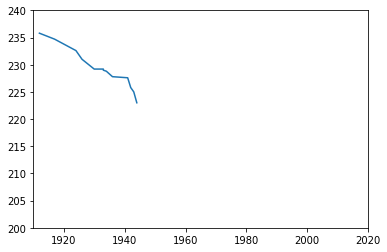

In [7]:
import matplotlib.pyplot as plt
plt.plot(years, seconds)
plt.axis([1910, 2020, 200, 240])
plt.savefig("records.pdf")

In [8]:
date.year

NameError: name 'date' is not defined